# Analyzing Portfolio Risk and Return

### Import the Data

#### Step 1: Import the required libraries and dependencies.

In [1]:
# Import the required libraries and dependencies:
# Pandas
import pandas as pd
# Numpy
import numpy as np
# Path rom pathlib
from pathlib import Path

%matplotlib inline

#### Step 2: Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

In [2]:
# Import the data by reading in the CSV file and setting the DatetimeIndex 
whale_navs = pd.read_csv(Path("Resources/whale_navs.csv"), index_col="date", parse_dates=True, infer_datetime_format=True)

# Review the first 5 rows of the DataFrame
whale_navs.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


#### Step 3: Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

In [3]:
# Prepare for the analysis by converting the dataframe of NAVs and prices to daily returns
# Drop any rows with all missing values
whale_navs_daily_returns = whale_navs.pct_change().dropna()

# Review the first five rows of the daily returns DataFrame.
whale_navs_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


---

## Quantative Analysis

The analysis has several components: performance, volatility, risk, risk-return profile, and portfolio diversification. You’ll analyze each component one at a time.

###  Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents.

#### Step 1:  Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Daily return data of the four fund whales and the S&P 500'}, xlabel='date'>

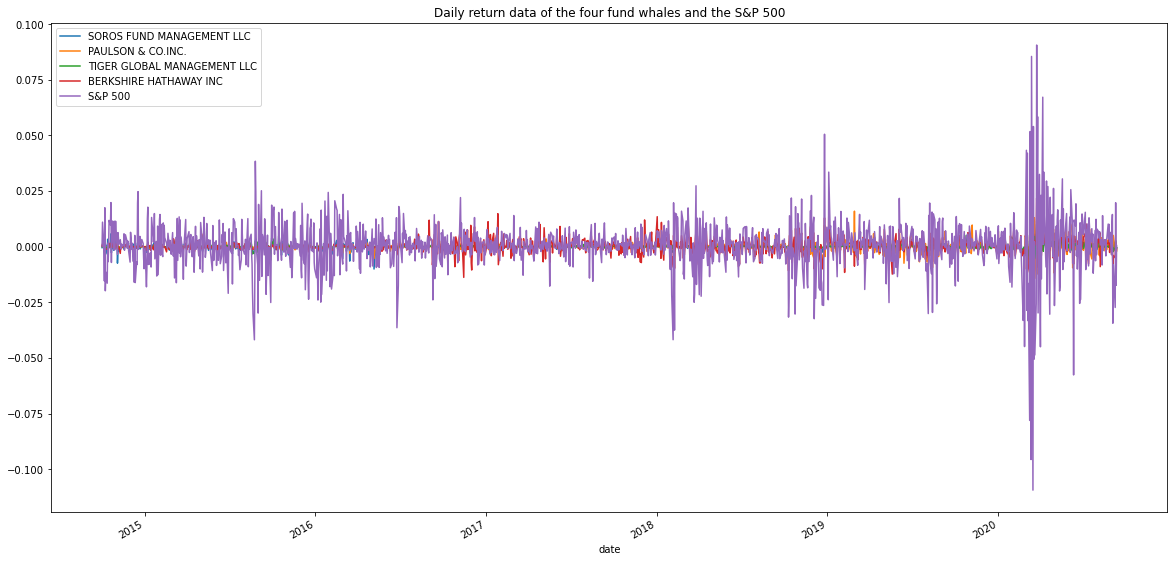

In [4]:
# Plot the daily return data of the 4 funds and the S&P 500 
# Inclue a title parameter and adjust the figure size
whale_navs_daily_returns.plot(kind="line", figsize=(20,10), title="Daily return data of the four fund whales and the S&P 500")

#### Step 2: Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

In [5]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500
# Review the last 5 rows of the cumulative returns DataFrame
whale_navs_daily_cumu_returns = (1 + whale_navs_daily_returns).cumprod()
whale_navs_daily_cumu_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,0.987355,0.958187,1.055714,1.244856,1.762645
2020-09-08,0.985640,0.956378,1.054373,1.238608,1.714484
2020-09-09,0.986739,0.958409,1.057221,1.240858,1.748341
2020-09-10,0.985498,0.959740,1.055539,1.237883,1.717983
2020-09-11,0.985086,0.957887,1.055081,1.236625,1.718858


#### Step 3: Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Cumulative return values of the four fund whales and the S&P 500'}, xlabel='date'>

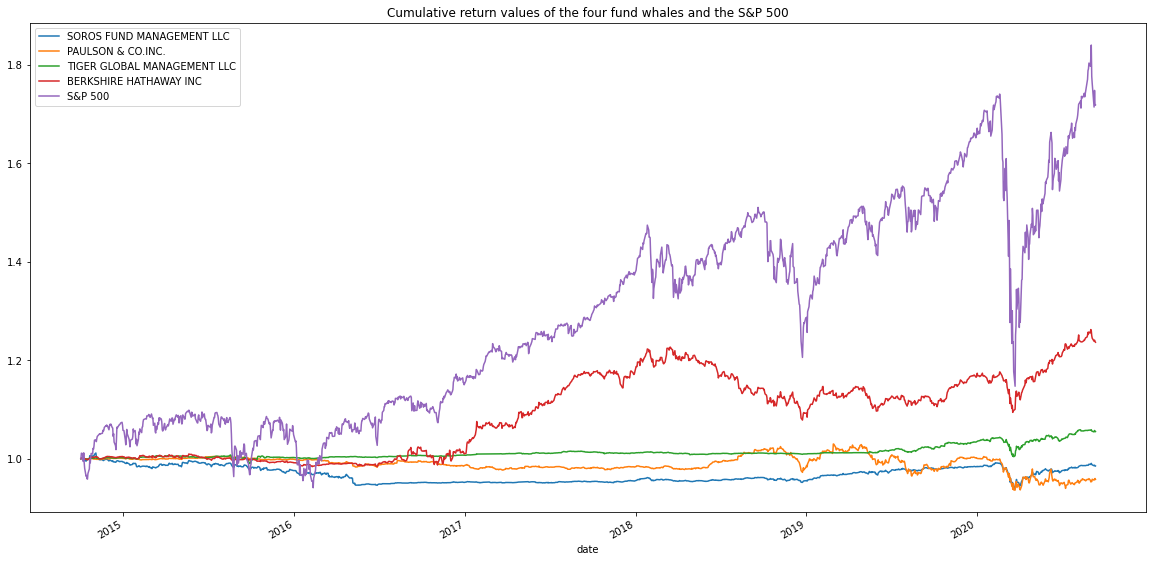

In [6]:
# Visualize the cumulative returns using the Pandas plot function
# Include a title parameter and adjust the figure size
whale_navs_daily_cumu_returns.plot(kind="line", figsize=(20,10), title="Cumulative return values of the four fund whales and the S&P 500")

#### Step 4: Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Question** Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Answer** # Based on cumulative return data non of all portfolios outperform the S&P 500. Cumulative return for S&P 500 is 171,88% vs 123,66% of BERKSHIRE HATHAWAY INC with highest cumulative return withn the 4 wales from the list. 

---

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots.

#### Step 1: Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Volatility of the four fund whales and the S&P 500'}>

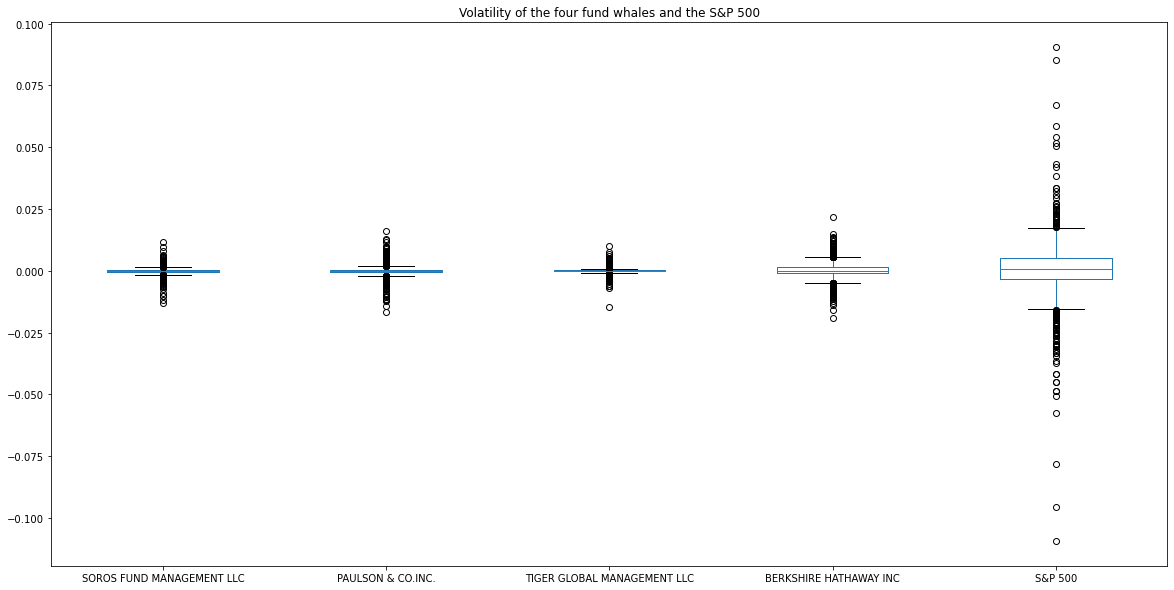

In [7]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size
whale_navs_daily_returns.plot(kind="box", figsize=(20,10), title="Volatility of the four fund whales and the S&P 500")

#### Step 2: Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Volatility of the four fund whales'}>

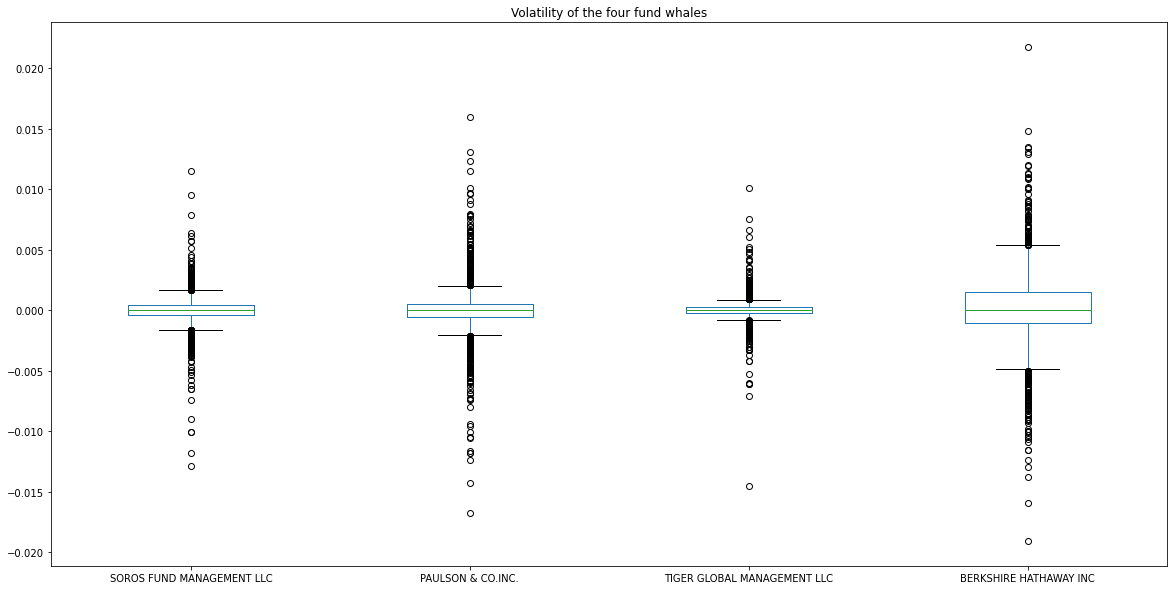

In [8]:
# Create a new DataFrame containing only the 4 fund portfolios by dropping the S&P 500 column from the DataFrame
whale_navs_returns_only = whale_navs_daily_returns.drop(columns=["S&P 500"])

# Create box plots to reflect the return data for only the 4 fund portfolios
# Include a title parameter and adjust the figure size
whale_navs_returns_only.plot(kind="box", figsize=(20,10), title="Volatility of the four fund whales")

#### Step 3: Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Question** Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Answer** # BERKSHIRE HATHAWAY INC is the most volatile (with the greatest spread) and TIGER GLOBAL MANAGEMENT LLC is the least volatile (with the smallest spread).

---

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta.

#### Step 1: Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

In [9]:
# Calculate and sort the standard deviation for all 4 portfolios and the S&P 500
whales_std_deviation_daily_returns = whale_navs_daily_returns.std().sort_values()

# Review the standard deviations sorted smallest to largest
whales_std_deviation_daily_returns

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

#### Step 2: Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

In [10]:
# Calculate and sort the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
traiding_days = 252
whales_annualized_std_deviation_daily_returns = whales_std_deviation_daily_returns * np.sqrt(traiding_days)

# Review the annual standard deviations smallest to largest
whales_annualized_std_deviation_daily_returns

TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

#### Step 3: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Rolling standard deviations of the four fund portfolios and of the S&P 500 index'}, xlabel='date'>

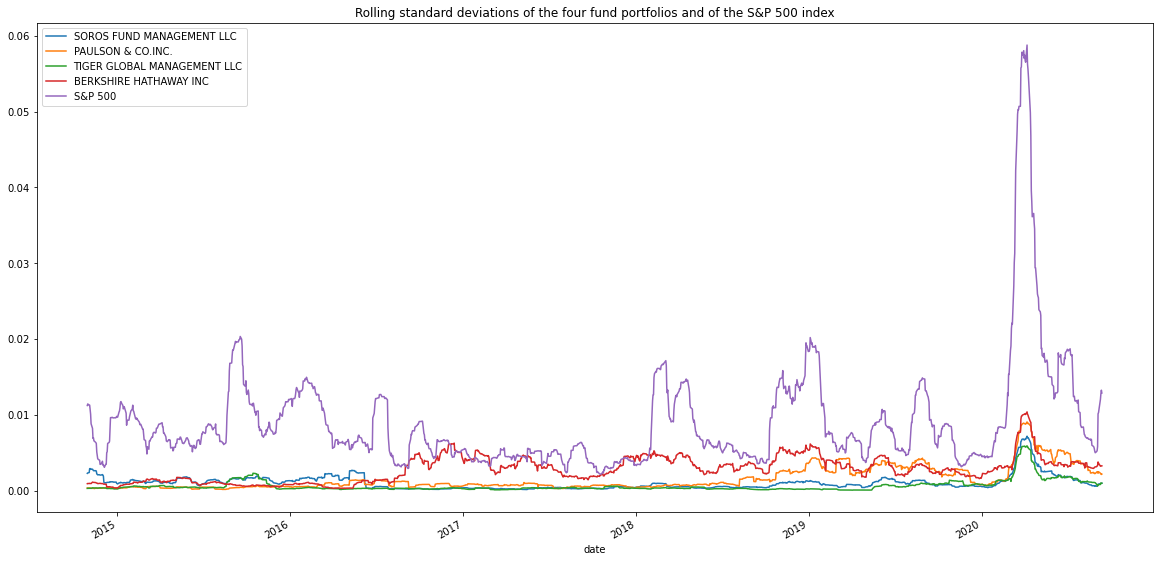

In [11]:
# Using the daily returns DataFrame and a 21-day rolling window, 
# plot the rolling standard deviation of the 4 portfolios and the S&P 500
# Include a title parameter and adjust the figure size
whale_navs_daily_returns.rolling(window=21).std().plot(figsize=(20,10), title="Rolling standard deviations of the four fund portfolios and of the S&P 500 index")

#### Step 4: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Rolling standard deviations of the four fund portfolios'}, xlabel='date'>

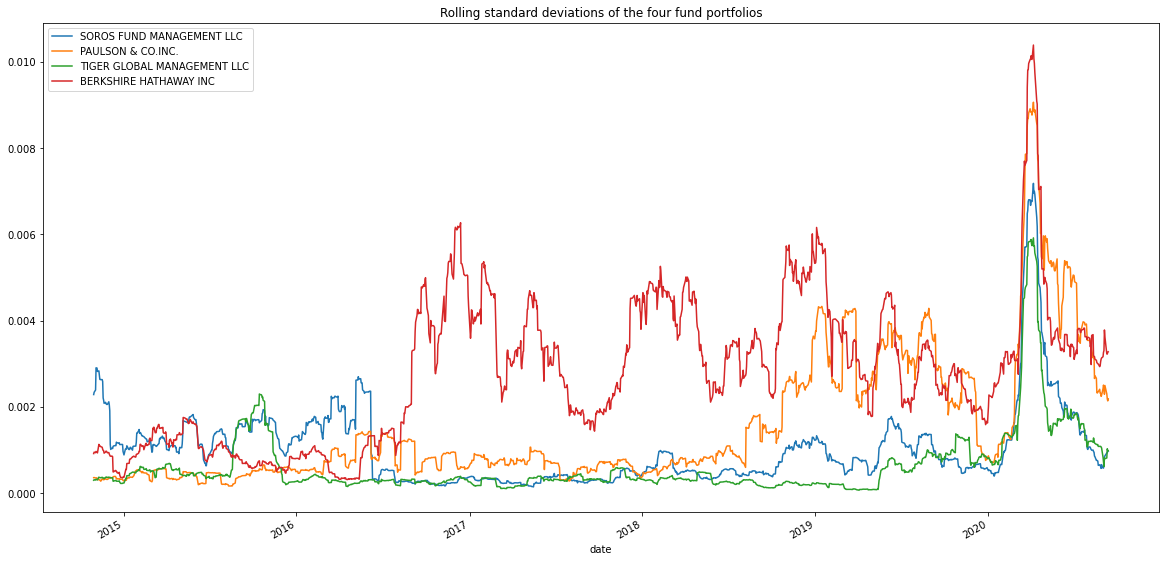

In [12]:
# Using the daily return data and a 21-day rolling window, plot the rolling standard deviation of just the 4 portfolios. 
# Include a title parameter and adjust the figure size
whale_navs_returns_only.rolling(window=21).std().plot(figsize=(20,10), title="Rolling standard deviations of the four fund portfolios")

#### Step 5: Answer the following three questions:

1. Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

2. Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

3. Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

**Question 1**  Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

**Answer 1** # BERKSHIRE HATHAWAY INC pose more risk than the S&P 500. Annualized standart deviation is 0.051692

**Question 2** Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

**Answer 2** # Yes, we can say that risk of each portfolio increased at pretty same time at the beginning of 2019 because violity 


**Question 3** Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time? 

**Answer 3** # Most volatile stock is BERKSHIRE HATHAWAY INC, it is most risky portfolio. But if we check whole period, BERKSHIRE HATHAWAY INC 's volatile was on pretty same level with the other stocks and started to change a lot in the middle of 2016.

---

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio.

#### Step 1: Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

In [13]:
# Calculate the annual average return data for the for fund portfolios and the S&P 500
# Use 252 as the number of trading days in the year
traiding_days = 252
whale_navs_daily_returns_annualized_ave = whale_navs_daily_returns.mean() * traiding_days

# Review the annual average returns sorted from lowest to highest
whale_navs_daily_returns_annualized_ave.sort_values()

PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

#### Step 2: Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

In [14]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
whale_navs_daily_returns_sharpe_rations = whale_navs_daily_returns_annualized_ave / whales_annualized_std_deviation_daily_returns

# Review the Sharpe ratios sorted lowest to highest 
whale_navs_daily_returns_sharpe_rations.sort_values()

PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

#### Step 3: Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Sharpe ratios for the four funds and for the S&P 500'}>

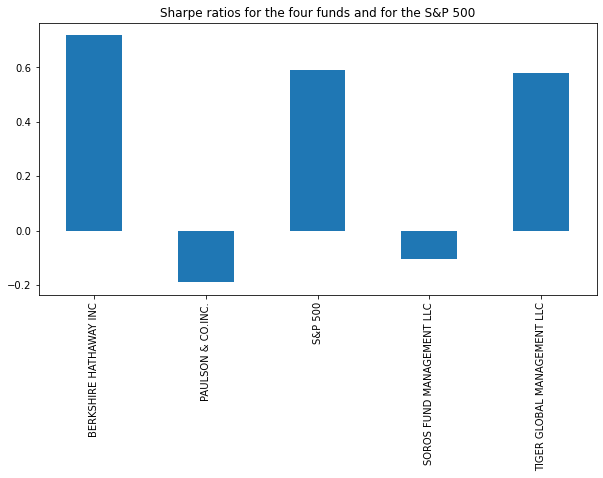

In [15]:
# Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size
whale_navs_daily_returns_sharpe_rations.plot(kind="bar", figsize=(10,5), title="Sharpe ratios for the four funds and for the S&P 500")

#### Step 4: Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

**Question** Which of the four portfolios offers the best risk-return profile? Which offers the worst?
    
**Answer** # PAULSON & CO.INC. is the worst offer with the Sharpe ratio - (-0.189998), the better risk profile is BERKSHIRE HATHAWAY INC with Sharpe retio - 0.717512.

---

### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options.

#### Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

In [16]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.
sxp500_navs_daily_returns_variance_60 = whale_navs_daily_returns["S&P 500"].rolling(window=60).var()

# Review the last five rows
sxp500_navs_daily_returns_variance_60.tail()

date
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, dtype: float64

<AxesSubplot:title={'center':'S&P 500 - 60 days rolling beta'}, xlabel='date'>

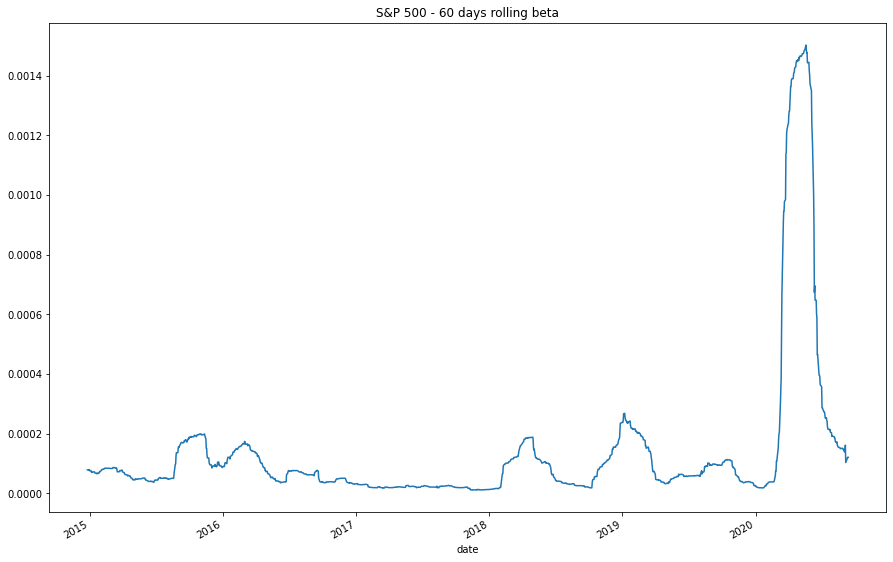

In [17]:
sxp500_navs_daily_returns_variance_60.plot(figsize=(15,10), title="S&P 500 - 60 days rolling beta")

#### For each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

##### Portfolio 1 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [18]:
# Calculate the covariance using a 60-day rolling window 
berkshire_covariance_60 = whale_navs_daily_returns["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(whale_navs_daily_returns["S&P 500"])

# Review the last five rows of the covariance data
berkshire_covariance_60.tail()

date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

##### Portfolio 1 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [19]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
beta_berkshire = berkshire_covariance_60 / sxp500_navs_daily_returns_variance_60

# Review the last five rows of the beta information
beta_berkshire.tail()

date
2020-09-04    0.207879
2020-09-08    0.203051
2020-09-09    0.196632
2020-09-10    0.197543
2020-09-11    0.199411
dtype: float64

##### Portfolio 1 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [20]:
# Calculate the average of the 60-day rolling beta
beta_berkshire_ave = beta_berkshire.mean()
beta_berkshire_ave

0.2214986101354593

##### Portfolio 1 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'BERKSHIRE HATHAWAY INC - 60 days rolling beta'}, xlabel='date'>

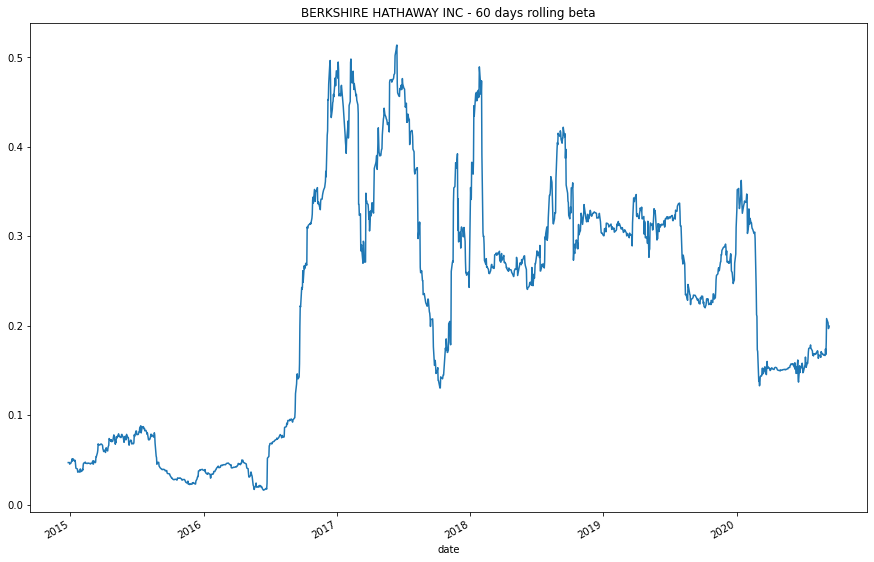

In [21]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
beta_berkshire.plot(figsize=(15,10), title="BERKSHIRE HATHAWAY INC - 60 days rolling beta")

##### Portfolio 2 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [22]:
# Calculate the covariance using a 60-day rolling window 
tiger_covariance_60 = whale_navs_daily_returns["TIGER GLOBAL MANAGEMENT LLC"].rolling(window=60).cov(whale_navs_daily_returns["S&P 500"])

# Review the last five rows of the covariance data
tiger_covariance_60.tail()

date
2020-09-04    0.000008
2020-09-08    0.000009
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

##### Portfolio 2 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [23]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
beta_tiger = tiger_covariance_60 / sxp500_navs_daily_returns_variance_60

# Review the last five rows of the beta information
beta_tiger.tail()

date
2020-09-04    0.081061
2020-09-08    0.076672
2020-09-09    0.079575
2020-09-10    0.080934
2020-09-11    0.081378
dtype: float64

##### Portfolio 2 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [24]:
# Calculate the average of the 60-day rolling beta
beta_tiger_ave = beta_tiger.mean()
beta_tiger_ave

0.03093001487238774

##### Portfolio 2 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'TIGER GLOBAL MANAGEMENT LLC - 60 days rolling beta'}, xlabel='date'>

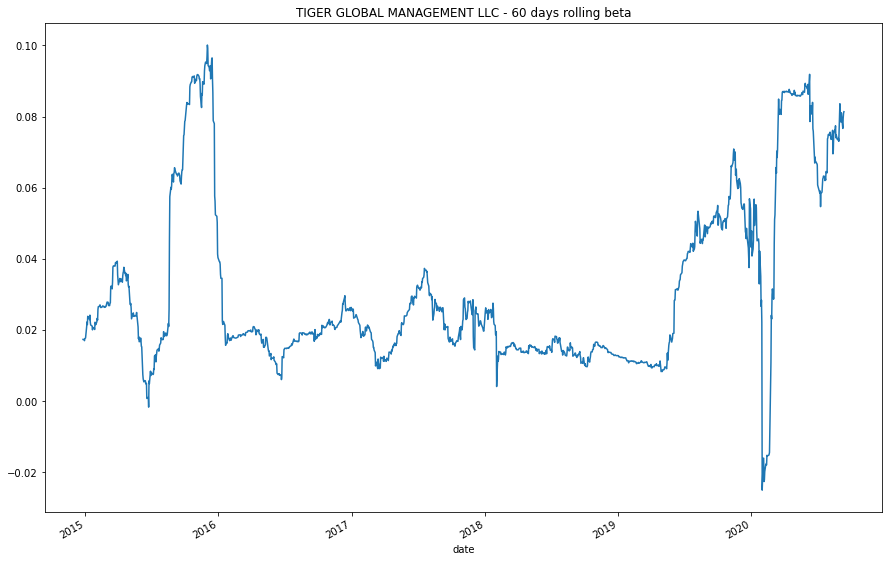

In [25]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
beta_tiger.plot(figsize=(15,10), title="TIGER GLOBAL MANAGEMENT LLC - 60 days rolling beta")


#### Answer the following two questions:

1. Which of the two portfolios seem more sensitive to movements in the S&P 500?

2. Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?

**Question 1** Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
**Answer 1** # Base on positive covariance (~0.000010) and beta < 1 (0.03093001487238774) of the TIGER GLOBAL MANAGEMENT LLC, we can say that company's bahavior is pretty same with market but changing of an asset value more sensitive to movement's of market because it is stands closer to S&P500.

**Question 2** Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?
    
**Answer 2** # I would recommend to add BERKSHIRE HATHAWAY INC to the firm's suite, because the covariance of the asset is 0,00002 > 0 and behaviors is pretty same with the market but changing of asset value (beta = 0,2) is less than market changing of value (1). And I would buy it as it moves more smoothly.

---